# 一、 数据获取余票数据

# 1.几行简单代码获取某区间某日所有余票数据

## 1.1读取SHANGHAI-SUZHOU单个页面数据

首先要分析网站，怎么样才能获取数据

In [1]:
import requests
import json

In [2]:
url = 'https://kyfw.12306.cn/otn/lcxxcx/query?purpose_codes=ADULT&queryDate=2016-12-29&from_station=SHH&to_station=NJH'

In [3]:
js = requests.get(url).text

/Library/Python/2.7/site-packages/requests/packages/urllib3/util/ssl_.py:315: SNIMissingWarning: An HTTPS request has been made, but the SNI (Subject Name Indication) extension to TLS is not available on this platform. This may cause the server to present an incorrect TLS certificate, which can cause validation failures. For more information, see https://urllib3.readthedocs.org/en/latest/security.html#snimissingwarning.
  SNIMissingWarning
/Library/Python/2.7/site-packages/requests/packages/urllib3/util/ssl_.py:120: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. For more information, see https://urllib3.readthedocs.org/en/latest/security.html#insecureplatformwarning.
  InsecurePlatformWarning


SSLError: [Errno 1] _ssl.c:507: error:14090086:SSL routines:SSL3_GET_SERVER_CERTIFICATE:certificate verify failed

https://promotion.aliyun.com/ntms/act/globalhttps.html?spm=5176.8142029.418686.5.yBwhSy<br>
HTTPS在HTTP的基础上加入了SSL/TLS协议，依靠SSL证书来验证服务器的身份，并为客户端和服务器端之间建立“SSL加密通道”，确保用户数据在传输过程中处于加密状态，同时防止服务器被钓鱼网站假冒。

In [6]:
js = requests.get(url,verify=False).text

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [384]:
js = requests.get(url,verify=False).text

In [7]:
js2 = json.loads(js)

In [8]:
data = js2['data']['datas']

In [387]:
data

[{u'arrive_time': u'05:31',
  u'canWebBuy': u'Y',
  u'control_day': 29,
  u'control_train_day': u'20300303',
  u'controlled_train_flag': u'0',
  u'controlled_train_message': u'\u6b63\u5e38\u8f66\u6b21\uff0c\u4e0d\u53d7\u63a7',
  u'day_difference': u'0',
  u'end_city_code': u'0705',
  u'end_province_code': u'07',
  u'end_station_name': u'\u5357\u4eac',
  u'end_station_telecode': u'NJH',
  u'from_station_name': u'\u4e0a\u6d77\u5357',
  u'from_station_no': u'14',
  u'from_station_telecode': u'SNH',
  u'gg_num': u'--',
  u'gr_num': u'--',
  u'is_support_card': u'0',
  u'lishi': u'01:17',
  u'lishiValue': u'77',
  u'location_code': u'G1',
  u'note': u'',
  u'qt_num': u'--',
  u'rw_num': u'11',
  u'rz_num': u'--',
  u'sale_time': u'1530',
  u'seat_feature': u'W3431333',
  u'seat_types': u'1413',
  u'start_city_code': u'1004',
  u'start_province_code': u'10',
  u'start_station_name': u'\u798f\u5dde',
  u'start_station_telecode': u'FZS',
  u'start_time': u'04:14',
  u'start_train_date': u'2016

## 1.2将数据读入pandas并进行处理后保存

In [20]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.DataFrame(data)
df.tail()

In [11]:
df.columns

Index([u'arrive_time', u'canWebBuy', u'control_day', u'control_train_day',
       u'controlled_train_flag', u'controlled_train_message',
       u'day_difference', u'end_city_code', u'end_province_code',
       u'end_station_name', u'end_station_telecode', u'from_station_name',
       u'from_station_no', u'from_station_telecode', u'gg_num', u'gr_num',
       u'is_support_card', u'lishi', u'lishiValue', u'location_code', u'note',
       u'qt_num', u'rw_num', u'rz_num', u'sale_time', u'seat_feature',
       u'seat_types', u'start_city_code', u'start_province_code',
       u'start_station_name', u'start_station_telecode', u'start_time',
       u'start_train_date', u'station_train_code', u'swz_num',
       u'to_station_name', u'to_station_no', u'to_station_telecode',
       u'train_class_name', u'train_no', u'train_seat_feature',
       u'train_type_code', u'tz_num', u'wz_num', u'yb_num', u'yp_ex',
       u'yp_info', u'yw_num', u'yz_num', u'ze_num', u'zy_num'],
      dtype='object')

In [13]:
df_use = df[[u'train_no',
            u'station_train_code',
             u'from_station_name',
             u'to_station_name',
             u'start_time',
             u'swz_num',
             u'tz_num',  #特等座
             u'zy_num',
             u'ze_num',
             u'wz_num',
             ]]

In [15]:
df_use = df_use[df_use[u'station_train_code'].str.startswith('G') | \
       df_use[u'station_train_code'].str.startswith('D')]
df_use.head()

,train_no,station_train_code,from_station_name,to_station_name,start_time,swz_num,tz_num,zy_num,ze_num,wz_num
2,5l0000D63630,D636,上海虹桥,苏州,06:09,--,--,12,73,无
3,5l000G191200,G1912,上海虹桥,苏州北,06:17,23,--,160,708,--
4,55000G703240,G7032,上海,苏州,06:18,--,--,50,522,无
5,5l000G180200,G1802,上海虹桥,苏州北,06:22,无,--,17,449,--
6,55000G7076A0,G7076,上海,苏州,06:23,--,--,3,63,无


In [16]:
df_use.replace('--',0,inplace=True) # 注意：--是指无此席位，并非指无余票
df_use.replace(u'无',0,inplace=True)

In [17]:
# df_use.reset_index(inplace=True)
df_use.head()

,train_no,station_train_code,from_station_name,to_station_name,start_time,swz_num,tz_num,zy_num,ze_num,wz_num
2,5l0000D63630,D636,上海虹桥,苏州,06:09,0,0,12,73,0
3,5l000G191200,G1912,上海虹桥,苏州北,06:17,23,0,160,708,0
4,55000G703240,G7032,上海,苏州,06:18,0,0,50,522,0
5,5l000G180200,G1802,上海虹桥,苏州北,06:22,0,0,17,449,0
6,55000G7076A0,G7076,上海,苏州,06:23,0,0,3,63,0


In [19]:
df_use.to_csv('./data/TEST2016-12-29-SH-SZ.csv',encoding='utf-8')

## 1.3一个完整代码

In [22]:
import requests
import pandas as pd
import json
#import arrow
import warnings
warnings.filterwarnings("ignore")

def get_pd(para):
    para = para
    r = requests.get('https://kyfw.12306.cn/otn/lcxxcx/query?purpose_codes=ADULT&' + \
                     para, verify=False).text
    return r

def to_csv(js):
    js2 = json.loads(js)
    data = js2['data']['datas']
    df = pd.DataFrame(data)
    df_use = df[[u'train_no',
            u'station_train_code',
                 u'from_station_name',
                 u'to_station_name',
                 u'start_time',
                 u'swz_num',
                 u'tz_num',
                 u'zy_num',
                 u'ze_num',
                 u'wz_num',
                 ]]
    df_use = df_use[df_use[u'station_train_code'].str.startswith('G') | \
    df_use[u'station_train_code'].str.startswith('D')]
    df_use.replace('--',0,inplace=True)
    df_use.replace(u'无',0,inplace=True)
#     tm = arrow.now().format('HH:mm:ss')
#     df_use['record_time'] = tm
    df_use.to_csv('./data/TEST2016-12-29-SH-NJ.csv',index=False,encoding='utf-8')
if __name__ == '__main__':
    para = 'queryDate=2016-12-29&from_station=SHH&to_station=NJH'
    js = get_pd(para)
    to_csv(js)
    print('finished')

finished


#### 多sheet录入
>writer = pd.ExcelWriter('./data/ht2016-12-10-SH-NJ.xlsx') <br>
>df_use.to_excel(writer,'Sheet1')<br>
>df.to_excel(writer,'Sheet2') <br>
>writer.save()<br>

#  2. 类-面向对象（获取沪宁、宁沪所有站点某日所有余票数据）

```
hu_ning = ['SHH','KNH','SZH','WXH','CZH','DYH','ZJH','NJH']
# station_ls_comb = []
for i in range(0,len(hu_ning)-1):
    ls = [hu_ning[i],hu_ning[i+1]]
#     station_ls_comb.append(ls)
    print ls
# print station_ls_comb
```

In [ ]:
hu_ning = ['SHH','KNH','SZH','WXH','CZH','DYH','ZJH','NJH']
ning_hu = ['NJH','ZJH','DYH','CZH','WXH','SZH','KNH','SHH']

## 2.1进行站点之间组合

# $C^{2}_8$

In [399]:
from itertools import combinations
hu_ning = ['SHH','KNH','SZH','WXH','CZH','DYH','ZJH','NJH']
com = combinations(hu_ning,2)
for i in com:
    print i

('SHH', 'KNH')
('SHH', 'SZH')
('SHH', 'WXH')
('SHH', 'CZH')
('SHH', 'DYH')
('SHH', 'ZJH')
('SHH', 'NJH')
('KNH', 'SZH')
('KNH', 'WXH')
('KNH', 'CZH')
('KNH', 'DYH')
('KNH', 'ZJH')
('KNH', 'NJH')
('SZH', 'WXH')
('SZH', 'CZH')
('SZH', 'DYH')
('SZH', 'ZJH')
('SZH', 'NJH')
('WXH', 'CZH')
('WXH', 'DYH')
('WXH', 'ZJH')
('WXH', 'NJH')
('CZH', 'DYH')
('CZH', 'ZJH')
('CZH', 'NJH')
('DYH', 'ZJH')
('DYH', 'NJH')
('ZJH', 'NJH')


## 2.2抓取特定时间所有站点数据-运行一次

In [23]:
import requests
import pandas as pd
import json
import arrow
from itertools import combinations
import warnings
warnings.filterwarnings("ignore")

class HighSpeed(object):
    def __init__(self,date,from_station,to_station):
        self.date = date
        self.from_station = from_station
        self.to_station = to_station

    
#     url = 'https://kyfw.12306.cn/otn/lcxxcx/query?purpose_codes=ADULT
#     &queryDate=2016-12-29&from_station=SHH&to_station=SZH'

    def get_pd(self):
        para = 'queryDate=' + self.date + '&from_station=' + self.from_station \
               +'&to_station=' + self.to_station
        r = requests.get('https://kyfw.12306.cn/otn/lcxxcx/query?purpose_codes=ADULT&' + \
                         para, verify=False).text
        return r

    def to_csv(self):
        js = self.get_pd()
        js2 = json.loads(js)
        data = js2['data']['datas']
        df = pd.DataFrame(data)
        df_use = df[[u'train_no',
                u'station_train_code',
                     u'from_station_name',
                     u'to_station_name',
                     u'start_time',
                     u'swz_num',
                     u'tz_num',
                     u'zy_num',
                     u'ze_num',
                     u'wz_num',
                     ]]
        df_use = df_use[df_use[u'station_train_code'].str.startswith('G') | \
        df_use[u'station_train_code'].str.startswith('D')]
        df_use.replace('--',0,inplace=True)
        df_use.replace(u'无',0,inplace=True)    
        
        tm = arrow.now().format('HH:mm')
        df_use['record_time'] = tm
        
#         df_use = df_choose[df_choose['record_time'] == df_choose['start_time']]
      
        df_use.to_csv('./data/' + self.date + 'TEST.csv',
                       mode = 'a', index = False, 
                      column = False,
                      encoding='utf-8')
         
if __name__ == '__main__':
    date = '2016-12-29'    
    hu_ning = ['SHH','KNH','SZH','WXH','CZH','DYH','ZJH','NJH']
    com = combinations(hu_ning,2)
    for ls in com:
        hspeed = HighSpeed(date,ls[0],ls[1])
        hspeed.to_csv()
    print('finished')

finished


# 3.按时间自动抓取余票数据

## 3.1 时间库与流程库

#### 流程控制库

In [ ]:
import schedule
import time

def job():
    print("I'm working...")

schedule.every(1).minutes.do(job)
# schedule.every().hour.do(job)
# schedule.every().day.at("14:09").do(job)
# schedule.every().monday.do(job)
# schedule.every().wednesday.at("13:15").do(job)

while True:
    schedule.run_pending()
    time.sleep(1)

I'm working...
I'm working...


In [ ]:
import threading
import time
import schedule
import arrow

def job():
    date = arrow.now().format('mm:ss')
    print("I'm running on job",date)

def job2():
    date = arrow.now().format('mm:ss')
    print("I'm running on job2",date)

def run_threaded(job_func):
    job_thread = threading.Thread(target=job_func)
    job_thread.start()


schedule.every(10).seconds.do(run_threaded, job)
schedule.every(10).seconds.do(run_threaded, job2)



while 1:
    schedule.run_pending()
    time.sleep(1)

#### 时间转换库

In [26]:
import arrow
tm = arrow.now()
print tm.format('HH:mm:ss')
    
tm_debefore30m = tm.replace(minutes=-30)
print tm_debefore30m

14:59:06
2016-12-15T14:29:06.772000+08:00


In [8]:
tm2_debefore30m = tm.replace(minutes=-30).format('HH:mm')
print tm2_debefore30m

13:46


In [43]:
date = arrow.now().format('YYYY-MM-DD')
date

u'2016-12-15'

## 3.2 每间隔一分钟抓取一次，所有站点数据-运行一次

In [ ]:
# -*- coding:utf-8 -*-

import requests
import pandas as pd
import json
import schedule
import threading
import time
import arrow
from itertools import combinations
import warnings
warnings.filterwarnings("ignore")

class HighSpeed(object):
    def __init__(self,date,from_station,to_station,direction):
        self.date = date
        self.from_station = from_station
        self.to_station = to_station
        self.direction = direction

    def get_pd(self):
        try:
            para = 'queryDate=' + self.date + '&from_station=' + self.from_station \
                   +'&to_station=' + self.to_station
            r = requests.get('https://kyfw.12306.cn/otn/lcxxcx/query?purpose_codes=ADULT&' + \
                             para, verify=False).text
            return r
        except:
            fl = open('./data/log.txt','a')
            fl.write('requests error at ' + str(arrow.now().format('HH:mm'))+ "\n")
            fl.close()
            print("requests error at "+str(arrow.now().format('HH:mm')))

    def to_csv(self):
        js = self.get_pd()
        try:
            js2 = json.loads(js)
            data = js2['data']['datas']
            df = pd.DataFrame(data)
            df_use = df[[u'train_no',
                     u'station_train_code',
                         u'from_station_name',
                         u'to_station_name',
                         u'start_time',
                         u'swz_num',
                         u'tz_num',
                         u'zy_num',
                         u'ze_num',
                         u'wz_num',
                         ]]
            df_use = df_use[df_use[u'station_train_code'].str.startswith('G') | \
            df_use[u'station_train_code'].str.startswith('D')]
            df_use.replace('--',0,inplace=True)
            df_use.replace(u'无',0,inplace=True)
            tm = arrow.now()
            df_use['record_date'] = tm.format('YYYY-MM-DD')
            df_use['record_time'] = tm.format('HH:mm')
            df_use.to_csv('./data/' + self.direction + "-" +self.date + '.csv',mode = 'a', index = False, header = False,encoding='utf-8')
        except:
            print 'no json data!'
        print 'I am working!'

    
        
if __name__ == '__main__':
       
    def process_hspeed():
        date = arrow.now().format('YYYY-MM-DD')    
        
        hu_ning = ['SHH','KNH','SZH','WXH','CZH','DYH','ZJH','NJH']
        com = combinations(hu_ning,2)
        for ls_hu_ning in com:
            hspeed = HighSpeed(date,ls_hu_ning[0],ls_hu_ning[1],'HuNing')
            hspeed.to_csv()
    
    def process_hspeed2():   
        date = arrow.now().format('YYYY-MM-DD')
        ning_hu = ['NJH','ZJH','DYH','CZH','WXH','SZH','KNH','SHH']
        com = combinations(ning_hu,2)
        for ls_ning_hu in com:
            hspeed = HighSpeed(date,ls_ning_hu[0],ls_ning_hu[1],'NingHu')
            hspeed.to_csv()

    def run_threaded(job_func):
        job_thread = threading.Thread(target=job_func)
        job_thread.start()


#     def job():
#         print("I'm working...")

    schedule.every(1).minutes.do(run_threaded,process_hspeed)
    schedule.every(1).minutes.do(run_threaded,process_hspeed2)
    # schedule.every().hour.do(job)
    # schedule.every().day.at("14:09").do(job)
    # schedule.every().monday.do(job)
    # schedule.every().wednesday.at("13:15").do(job)

    while True:
        schedule.run_pending()
        time.sleep(1)



# 4.判断可用数据

In [1]:
import pandas as pd
import arrow
df_hu_ning = pd.read_csv('./data/HuNing-2016-12-21.csv',encoding='utf-8')
df_hu_ning.tail()

,55000G703240,G7032,上海,昆山南,06:18,0,0.1,35,358,164,2016-12-21,00:00
2412834,550000D30661,D306,苏州,南京,23:14,0,0,0,3,0,2016-12-21,23:20
2412835,550000D30661,D306,苏州,南京,23:14,0,0,0,3,0,2016-12-21,23:21
2412836,550000D30661,D306,苏州,南京,23:14,0,0,0,3,0,2016-12-21,23:24
2412837,550000D30661,D306,苏州,南京,23:14,0,0,0,3,0,2016-12-21,23:24
2412838,550000D30661,D306,苏州,南京,23:14,0,0,0,3,0,2016-12-21,23:25


In [2]:
df_hu_ning.columns = [u'train_no',
    u'station_train_code',
                     u'from_station_name',
                     u'to_station_name',
                     u'start_time',
                     u'swz_num',
                     u'tz_num',
                     u'zy_num',
                     u'ze_num',
                     u'wz_num',
              u'record_date',
              u'record_time',]
df_hu_ning.tail()

,train_no,station_train_code,from_station_name,to_station_name,start_time,swz_num,tz_num,zy_num,ze_num,wz_num,record_date,record_time
2412834,550000D30661,D306,苏州,南京,23:14,0,0,0,3,0,2016-12-21,23:20
2412835,550000D30661,D306,苏州,南京,23:14,0,0,0,3,0,2016-12-21,23:21
2412836,550000D30661,D306,苏州,南京,23:14,0,0,0,3,0,2016-12-21,23:24
2412837,550000D30661,D306,苏州,南京,23:14,0,0,0,3,0,2016-12-21,23:24
2412838,550000D30661,D306,苏州,南京,23:14,0,0,0,3,0,2016-12-21,23:25


In [6]:
df_hu_ning[df_hu_ning['station_train_code'] == 'G1814']

,train_no,station_train_code,from_station_name,to_station_name,start_time,swz_num,tz_num,zy_num,ze_num,wz_num,record_date,record_time
187,5l000G181400,G1814,上海虹桥,苏州北,13:45,5,0,14,285,0,2016-12-21,00:00
352,5l000G181400,G1814,上海虹桥,无锡东,13:45,3,0,11,189,0,2016-12-21,00:00
684,5l000G181400,G1814,上海虹桥,镇江南,13:45,3,0,10,158,0,2016-12-21,00:00
841,5l000G181400,G1814,上海虹桥,南京南,13:45,3,0,12,159,0,2016-12-21,00:00
1465,5l000G181400,G1814,苏州北,无锡东,14:10,3,0,11,191,0,2016-12-21,00:00
1754,5l000G181400,G1814,苏州北,镇江南,14:10,3,0,10,160,0,2016-12-21,00:00
1880,5l000G181400,G1814,苏州北,南京南,14:10,3,0,12,159,0,2016-12-21,00:00
2179,5l000G181400,G1814,无锡东,镇江南,14:27,3,0,12,161,0,2016-12-21,00:00
2305,5l000G181400,G1814,无锡东,南京南,14:27,3,0,14,162,0,2016-12-21,00:00
2797,5l000G181400,G1814,镇江南,南京南,14:59,3,0,15,164,0,2016-12-21,00:01


In [7]:
df_hu_ning[(df_hu_ning['station_train_code'] == 'G1814') & (df_hu_ning['record_time'] == '12:20')]

,train_no,station_train_code,from_station_name,to_station_name,start_time,swz_num,tz_num,zy_num,ze_num,wz_num,record_date,record_time
1888528,5l000G181400,G1814,上海虹桥,苏州北,13:45,4,0,8,271,0,2016-12-21,12:20
1888623,5l000G181400,G1814,上海虹桥,无锡东,13:45,2,0,4,154,0,2016-12-21,12:20
1888816,5l000G181400,G1814,上海虹桥,镇江南,13:45,2,0,3,113,0,2016-12-21,12:20
1888885,5l000G181400,G1814,上海虹桥,南京南,13:45,2,0,3,99,0,2016-12-21,12:20
1889297,5l000G181400,G1814,苏州北,无锡东,14:10,2,0,4,159,0,2016-12-21,12:20
1889479,5l000G181400,G1814,苏州北,镇江南,14:10,2,0,3,116,0,2016-12-21,12:20
1889542,5l000G181400,G1814,苏州北,南京南,14:10,2,0,3,99,0,2016-12-21,12:20
1889733,5l000G181400,G1814,无锡东,镇江南,14:27,3,0,6,120,0,2016-12-21,12:20
1889797,5l000G181400,G1814,无锡东,南京南,14:27,3,0,6,105,0,2016-12-21,12:20
1890117,5l000G181400,G1814,镇江南,南京南,14:59,3,0,8,105,0,2016-12-21,12:20


## 4.1 筛选出发车时间前30分钟的余票信息

> 上海——南京，最早发车时间为06:02，最后一个区间是	22:43  G7128  镇江至南京，<br>
> 南京——上海，最早发车时间为03:30，最后一个区间是	22:43  G7128  镇江至南京，

In [10]:
df_hu_ning2 = df_hu_ning[(df_hu_ning['start_time'].str.contains("0[6-9]:|1[0-9]:|2[0-3]:"))]
df_hu_ning2['start_time'].sort_values(ascending=True).head()

122841    06:02
615245    06:02
234014    06:02
615403    06:02
615542    06:02
Name: start_time, dtype: object

In [11]:
df_hu_ning2.head()

,train_no,station_train_code,from_station_name,to_station_name,start_time,swz_num,tz_num,zy_num,ze_num,wz_num,record_date,record_time
0,55000G7076A0,G7076,上海,昆山南,06:23,0,0,10,124,166,2016-12-21,00:00
1,5l000D300220,D3002,上海虹桥,昆山南,06:32,0,0,189,990,156,2016-12-21,00:00
2,5l000D220651,D2206,上海虹桥,昆山南,06:38,0,0,196,963,156,2016-12-21,00:00
3,5l000D307230,D3072,上海虹桥,昆山南,06:50,0,0,176,851,156,2016-12-21,00:00
4,5l000D305630,D3056,上海虹桥,昆山南,07:15,0,0,23,310,73,2016-12-21,00:00


In [35]:
time_choose = arrow.now()
print time_choose
time_before_30m = time_choose.replace(minutes=-30).format('HH:mm')
print time_before_30m

2016-12-18T20:11:15.578329+08:00
19:41


#### 小记录：开车前30分钟(test)

In [6]:
df_hu_ning2['start_time'].head()

0    06:23
1    06:32
2    06:38
3    06:50
4    07:15
Name: start_time, dtype: object

In [7]:
df_hu_ning2['start_time'].tail()

2000943    21:59
2000944    22:04
2000945    22:08
2000946    22:32
2000947    22:43
Name: start_time, dtype: object

In [8]:
arrow.get('08:05', 'HH:mm').replace(minutes=-30).format('HH:mm')

'07:35'

In [55]:
df_hu_ning2['start_time'].apply(lambda x: arrow.get(x, 'HH:mm').replace(minutes=-30).format('HH:mm')).head()

0    10:40
1    10:47
2    11:01
3    11:04
4    11:10
Name: start_time, dtype: object

#### 添加列，记录开车前30分钟数据

In [12]:
df_hu_ning2['start_time_before30m'] = df_hu_ning2['start_time'].apply(lambda x: arrow.get(x, 'HH:mm')\
                                                      .replace(minutes=-30).format('HH:mm'))
df_hu_ning2.head()

C:\Program Files (x86)\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,train_no,station_train_code,from_station_name,to_station_name,start_time,swz_num,tz_num,zy_num,ze_num,wz_num,record_date,record_time,start_time_before30m
0,55000G7076A0,G7076,上海,昆山南,06:23,0,0,10,124,166,2016-12-21,00:00,05:53
1,5l000D300220,D3002,上海虹桥,昆山南,06:32,0,0,189,990,156,2016-12-21,00:00,06:02
2,5l000D220651,D2206,上海虹桥,昆山南,06:38,0,0,196,963,156,2016-12-21,00:00,06:08
3,5l000D307230,D3072,上海虹桥,昆山南,06:50,0,0,176,851,156,2016-12-21,00:00,06:20
4,5l000D305630,D3056,上海虹桥,昆山南,07:15,0,0,23,310,73,2016-12-21,00:00,06:45


#### 记录时间==发车前30分钟数据，（高价值数据）

In [13]:
df_hu_ning2[df_hu_ning2['start_time_before30m'] == df_hu_ning2['record_time']].tail(5)

,train_no,station_train_code,from_station_name,to_station_name,start_time,swz_num,tz_num,zy_num,ze_num,wz_num,record_date,record_time,start_time_before30m
2412227,55000G721230,G7212,上海,苏州,22:41,10,0,19,337,147,2016-12-21,22:11,22:11
2412273,5j000G735010,G7350,常州,南京南,22:42,18,0,40,838,294,2016-12-21,22:12,22:12
2412306,5l000G7128A0,G7128,镇江,南京,22:43,0,0,39,445,168,2016-12-21,22:13,22:13
2412637,55000G721230,G7212,昆山南,苏州,23:02,10,0,20,383,147,2016-12-21,22:32,22:32
2412746,550000D30661,D306,苏州,南京,23:14,0,0,0,4,0,2016-12-21,22:44,22:44


In [14]:
df_hu_ning2[(df_hu_ning2['from_station_name'] == u'无锡东') &\
            (df_hu_ning2['station_train_code'] == 'G130') &\
           (df_hu_ning2['record_time'] == '11:34')]

,train_no,station_train_code,from_station_name,to_station_name,start_time,swz_num,tz_num,zy_num,ze_num,wz_num,record_date,record_time,start_time_before30m
1808765,5l0000G13061,G130,无锡东,常州北,12:03,1,0,6,57,0,2016-12-21,11:34,11:33
1808944,5l0000G13061,G130,无锡东,南京南,12:03,1,0,5,57,0,2016-12-21,11:34,11:33


#### df3为可用数据

In [15]:
df_hu_ning3 = df_hu_ning2[df_hu_ning2['start_time_before30m'] == df_hu_ning2['record_time']]
print len(df_hu_ning3)

2814


In [17]:
df_hu_ning3[df_hu_ning3['station_train_code'] == 'G130']

,train_no,station_train_code,from_station_name,to_station_name,start_time,swz_num,tz_num,zy_num,ze_num,wz_num,record_date,record_time,start_time_before30m
1733780,5l0000G13061,G130,上海虹桥,苏州北,11:26,10,0,13,320,0,2016-12-21,10:56,10:56
1733891,5l0000G13061,G130,上海虹桥,无锡东,11:26,10,0,2,250,0,2016-12-21,10:56,10:56
1733993,5l0000G13061,G130,上海虹桥,常州北,11:26,2,0,1,96,0,2016-12-21,10:56,10:56
1734196,5l0000G13061,G130,上海虹桥,南京南,11:26,2,0,0,84,0,2016-12-21,10:56,10:56
1783697,5l0000G13061,G130,苏州北,无锡东,11:51,10,0,3,203,0,2016-12-21,11:21,11:21
1783789,5l0000G13061,G130,苏州北,常州北,11:51,1,0,1,67,0,2016-12-21,11:21,11:21
1783972,5l0000G13061,G130,苏州北,南京南,11:51,1,0,1,60,0,2016-12-21,11:21,11:21
1806884,5l0000G13061,G130,无锡东,常州北,12:03,1,0,6,57,0,2016-12-21,11:33,11:33
1807063,5l0000G13061,G130,无锡东,南京南,12:03,1,0,5,57,0,2016-12-21,11:33,11:33
1840495,5l0000G13061,G130,常州北,南京南,12:22,3,0,12,49,0,2016-12-21,11:52,11:52


#### 加一条列，记录起止站数据

In [21]:

df_hu_ning3.head(2)

C:\Program Files (x86)\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Program Files (x86)\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Program Files (x86)\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

,train_no,station_train_code,from_station_name,to_station_name,start_time,swz_num,tz_num,zy_num,ze_num,wz_num,record_date,record_time,start_time_before30m,from_to
934300,55000G707270,G7072,上海,无锡,06:02,19,0,44,222,294,2016-12-21,05:32,05:32,"[上海, 无锡]"
934458,55000G707270,G7072,上海,常州,06:02,19,0,44,192,294,2016-12-21,05:32,05:32,"[上海, 常州]"


In [23]:
type(df_hu_ning3['from_to'][934300])

list

#### from_to为列表

In [24]:
df_hu_ning3.from_to[934300]

[u'\u4e0a\u6d77', u'\u65e0\u9521']

#### 导出为JSON数据

In [26]:
df_hu_ning3.to_json('./data/df_hu_ning.json')

In [27]:
df_test = pd.read_json('./data/df_hu_ning.json')

In [28]:
df_test.head(2)

,from_station_name,from_to,record_date,record_time,start_time,start_time_before30m,station_train_code,swz_num,to_station_name,train_no,tz_num,wz_num,ze_num,zy_num
1016923,上海虹桥,"[上海虹桥, 无锡]",2016-12-21,2016-12-22 06:02:00,2016-12-22 06:32:00,06:02,D3002,0,无锡,5l000D300220,0,156,912,181
1017081,上海虹桥,"[上海虹桥, 常州]",2016-12-21,2016-12-22 06:02:00,2016-12-22 06:32:00,06:02,D3002,0,常州,5l000D300220,0,156,817,167


In [30]:
df_test.ix[934300,'from_to']

[u'\u4e0a\u6d77', u'\u65e0\u9521']

## 2.2 汇总前一区间与下一区间的余票，并计算站点的上下客情况。

>step1:添加一列，统计余票总数（如果有可能，可去获取上车多少人？）;<br>
>step2:前一个数据减后一个数据，即可获得中间站的上下客情况。

>中间站即为下一条数据的from_station_name

# 二、获取各车次区间情况

# 1. 区间站信息获取

## 1.1 获取沪宁-宁沪线车次

https://kyfw.12306.cn/otn/czxx/queryByTrainNo?train_no=5l000G191200&from_station_telecode=SHH&to_station_telecode=NJH&depart_date=2016-12-23

In [68]:
import requests
import pandas as pd
import json
#import arrow
import warnings
warnings.filterwarnings("ignore")

def get_pd(para):
    para = para
    r = requests.get('https://kyfw.12306.cn/otn/lcxxcx/query?purpose_codes=ADULT&' + \
                     para, verify=False).text
    return r

def to_csv(js):
    js2 = json.loads(js)
    data = js2['data']['datas']
    df = pd.DataFrame(data)
    df_use = df[[u'train_no',
            u'station_train_code',
                 u'from_station_name',
                 u'to_station_name',
                 u'start_time',
                 u'swz_num',
                 u'tz_num',
                 u'zy_num',
                 u'ze_num',
                 u'wz_num',
                 ]]
    df_use = df_use[df_use[u'station_train_code'].str.startswith('G') | \
    df_use[u'station_train_code'].str.startswith('D')]
    df_use.replace('--',0,inplace=True)
    df_use.replace(u'无',0,inplace=True)
#     tm = arrow.now().format('HH:mm:ss')
#     df_use['record_time'] = tm
    df_use[u'train_no'].to_csv('./data/SH-NJ-train_no.csv',index=False,encoding='utf-8')
#     df_use[u'train_no'].to_csv('./data/NJ-SH-train_no.csv',index=False,encoding='utf-8')
    
if __name__ == '__main__':
    para = 'queryDate=2016-12-29&from_station=SHH&to_station=NJH'
#     para = 'queryDate=2016-12-29&from_station=NJH&to_station=SHH'
    js = get_pd(para)
    to_csv(js)
    print('finished')

finished


## 1.2 获取各车次，站点信息

#### 3个参数需要调整

In [70]:
import requests
import pandas as pd
import json
#import arrow
import warnings
warnings.filterwarnings("ignore")


def get_pd(para):
    para = para
    r = requests.get('https://kyfw.12306.cn/otn/czxx/queryByTrainNo?train_no='+para+\
                     '&from_station_telecode=NJH&to_station_telecode=SHH&depart_date=2016-12-29',
                     verify=False).text
    return r

def to_csv(para,js):
    js2 = json.loads(js)
    data = js2['data']['data']
    df = pd.DataFrame(data)
    try:
        df = df[["station_name",]]
        df_use = pd.DataFrame({'train_no':[''],'station_name':['']})
        df_use['train_no'] = para.strip()
        df_use['station_name'] = df_use['station_name'].apply(lambda x: df["station_name"].values)
    #     df_use['start_time'] = df_use['start_time'].apply(lambda x: df["start_time"].values)
    #     df_use = df_use[df_use[u'station_train_code'].str.startswith('G') | \
    #     df_use[u'station_train_code'].str.startswith('D')]
    #     df_use.replace('--',0,inplace=True)
    #     df_use.replace(u'无',0,inplace=True)
    #     tm = arrow.now().format('HH:mm:ss')
    #     df_use['record_time'] = tm
        df_use.to_csv('./data/NJ-SH-station.csv',mode = 'a',index=False,header=False,encoding='utf-8')
    except:
        pass
if __name__ == '__main__':
#     para = '55000G707270'
#     js = get_pd(para)
#     to_csv(para,js)
#     print('finished')
    station_no_file = open('./data/NJ-SH-train_no.csv','r')
    station_no_data = station_no_file.readlines()
    for station_no in station_no_data:
#         print station_no.strip()
#         para = '55000G707270'
        js = get_pd(station_no.strip())
        to_csv(station_no.strip(),js)
    print('finished')

finished


#### 读取信息

In [17]:
df_SH_NJ = pd.read_csv('./data/SH-NJ-station.csv',encoding='utf-8')
df_SH_NJ.tail()

,"[上海, 无锡, 常州, 丹阳, 镇江, 宝华山, 南京南, 马鞍山东, 当涂东, 芜湖, 弋江, 铜陵, 池州, 安庆]",55000G707270
198,"[上海, 苏州, 南京, 北京南]",550000D31490
199,"[上海虹桥, 昆山南, 苏州, 无锡, 常州, 镇江, 南京]",5l000G7128A0
200,"[深圳北, 惠州南, 惠东, 汕尾, 潮阳, 潮汕, 诏安, 漳浦, 漳州, 厦门北, 泉州...",6i000D228207
201,"[苍南, 鳌江, 温州南, 青田, 丽水, 缙云西, 永康南, 武义北, 义乌, 杭州东, ...",5j000G735010
202,"[上海, 苏州, 南京, 徐州, 郑州东, 洛阳龙门, 三门峡南, 华山北, 渭南北, 西安北]",550000D30661


In [18]:
len(df_SH_NJ)

203

In [19]:
df_SH_NJ.columns=['station_name','train_no']
df_SH_NJ[df_SH_NJ.train_no == '55000G701081']

,station_name,train_no
74,"[上海, 苏州, 无锡, 常州, 南京]",55000G701081


#### 添加列，进行组合

In [20]:
print df_SH_NJ['station_name'][0]

[上海虹桥, 无锡, 常州, 镇江, 南京南, 合肥南, 六安, 金寨, 麻城北, 汉口, 荆州, 宜昌东, 建始, 恩施, 利川, 石柱县, 涪陵北, 重庆北, 潼南, 遂宁, 成都东]


In [21]:
df_SH_NJ['station_name'][0]

u'[\u4e0a\u6d77\u8679\u6865, \u65e0\u9521, \u5e38\u5dde, \u9547\u6c5f, \u5357\u4eac\u5357, \u5408\u80a5\u5357, \u516d\u5b89, \u91d1\u5be8, \u9ebb\u57ce\u5317, \u6c49\u53e3, \u8346\u5dde, \u5b9c\u660c\u4e1c, \u5efa\u59cb, \u6069\u65bd, \u5229\u5ddd, \u77f3\u67f1\u53bf, \u6daa\u9675\u5317, \u91cd\u5e86\u5317, \u6f7c\u5357, \u9042\u5b81, \u6210\u90fd\u4e1c]'

In [23]:
df_SH_NJ['station_name'] = df_SH_NJ['station_name'].apply(lambda x: \
                                              x.replace(u'[',u'').replace(u']',u'').replace(' ','').split(','))

In [24]:
df_SH_NJ.tail()

,station_name,train_no
198,"[上海, 苏州, 南京, 北京南]",550000D31490
199,"[上海虹桥, 昆山南, 苏州, 无锡, 常州, 镇江, 南京]",5l000G7128A0
200,"[深圳北, 惠州南, 惠东, 汕尾, 潮阳, 潮汕, 诏安, 漳浦, 漳州, 厦门北, 泉州...",6i000D228207
201,"[苍南, 鳌江, 温州南, 青田, 丽水, 缙云西, 永康南, 武义北, 义乌, 杭州东, ...",5j000G735010
202,"[上海, 苏州, 南京, 徐州, 郑州东, 洛阳龙门, 三门峡南, 华山北, 渭南北, 西安北]",550000D30661


In [25]:
type(df_SH_NJ['station_name'][0])

list

In [26]:
len(df_SH_NJ['station_name'][0])

21

[上海虹桥, 无锡, 常州, 镇江, 南京南, 合肥南, 六安, 金寨, 麻城北, 汉口, 荆州, 宜昌东, 建始, 恩施, 利川, 石柱县, 涪陵北, 重庆北, 潼南, 遂宁, 成都东]

### 示例：将2数进行组合（zip与map函数、join方法的用法）

In [82]:
seq1 = ['one0', 'one1', 'one2']
seq2 = ['two0', 'two1', 'two2']
zip(seq1, seq2)

[('one0', 'two0'), ('one1', 'two1'), ('one2', 'two2')]

In [83]:
seq = ['one0', 'one1', 'one2', 'two0', 'two1', 'two2']
com= map(list,zip(seq[:-1], seq[1:]))
com

[['one0', 'one1'],
 ['one1', 'one2'],
 ['one2', 'two0'],
 ['two0', 'two1'],
 ['two1', 'two2']]

In [84]:
','.join(com[0])

'one0,one1'

In [ ]:
my_df['B'] = my_df.A.apply(lambda x: list(map(list, zip(x[:-1], x[1:]))))
my_df

In [27]:
dm = df_SH_NJ.copy()

In [28]:
dm['station_interval'] = dm['station_name'].apply(lambda x: list(map(list, zip(x[:-1], x[1:]))))
dm.head()

,station_name,train_no,station_interval
0,"[上海虹桥, 无锡, 常州, 镇江, 南京南, 合肥南, 六安, 金寨, 麻城北, 汉口, ...",5l0000D35270,"[[上海虹桥, 无锡], [无锡, 常州], [常州, 镇江], [镇江, 南京南], [南..."
1,"[上海虹桥, 苏州, 无锡, 常州, 镇江, 南京南, 全椒, 肥东, 合肥南, 六安, 金...",5l0000D63630,"[[上海虹桥, 苏州], [苏州, 无锡], [无锡, 常州], [常州, 镇江], [镇江..."
2,"[上海虹桥, 无锡东, 常州北, 镇江南, 南京南, 蚌埠南, 徐州东, 枣庄, 曲阜东, ...",5l0000G45630,"[[上海虹桥, 无锡东], [无锡东, 常州北], [常州北, 镇江南], [镇江南, 南京..."
3,"[上海虹桥, 苏州北, 常州北, 镇江南, 南京南, 蚌埠南, 徐州东, 砀山南, 商丘, ...",5l000G191200,"[[上海虹桥, 苏州北], [苏州北, 常州北], [常州北, 镇江南], [镇江南, 南京..."
4,"[上海, 昆山南, 苏州, 无锡, 常州, 丹阳, 镇江, 南京]",55000G703240,"[[上海, 昆山南], [昆山南, 苏州], [苏州, 无锡], [无锡, 常州], [常州..."


In [29]:
dm.station_interval[4]

[[u'\u4e0a\u6d77', u'\u6606\u5c71\u5357'],
 [u'\u6606\u5c71\u5357', u'\u82cf\u5dde'],
 [u'\u82cf\u5dde', u'\u65e0\u9521'],
 [u'\u65e0\u9521', u'\u5e38\u5dde'],
 [u'\u5e38\u5dde', u'\u4e39\u9633'],
 [u'\u4e39\u9633', u'\u9547\u6c5f'],
 [u'\u9547\u6c5f', u'\u5357\u4eac']]

In [30]:
type(dm['station_interval'][0][0])

list

In [32]:
dm.to_json('./data/df_hu_station_modifity.json')

# 三、余票数据与站点区间数据比对，获取是相邻站点的余票数据信息

In [31]:
import pandas as pd
import numpy as np
df_tickets = pd.read_json('./data/df_hu_ning.json')
df_tickets[df_tickets['train_no']=='55000G701081']

,from_station_name,from_to,record_date,record_time,start_time,start_time_before30m,station_train_code,swz_num,to_station_name,train_no,tz_num,wz_num,ze_num,zy_num
1680701,上海,"[上海, 苏州]",2016-12-21,2016-12-22 10:30:00,2016-12-22 11:00:00,10:30,G7010,0,苏州,55000G701081,15,294,572,25
1680816,上海,"[上海, 无锡]",2016-12-21,2016-12-22 10:30:00,2016-12-22 11:00:00,10:30,G7010,0,无锡,55000G701081,15,294,569,25
1680924,上海,"[上海, 常州]",2016-12-21,2016-12-22 10:30:00,2016-12-22 11:00:00,10:30,G7010,0,常州,55000G701081,16,294,597,24
1681137,上海,"[上海, 南京]",2016-12-21,2016-12-22 10:30:00,2016-12-22 11:00:00,10:30,G7010,0,南京,55000G701081,15,294,563,25
1736663,苏州,"[苏州, 无锡]",2016-12-21,2016-12-22 10:57:00,2016-12-22 11:27:00,10:57,G7010,0,无锡,55000G701081,16,294,595,32
1736760,苏州,"[苏州, 常州]",2016-12-21,2016-12-22 10:57:00,2016-12-22 11:27:00,10:57,G7010,0,常州,55000G701081,15,294,592,32
1736951,苏州,"[苏州, 南京]",2016-12-21,2016-12-22 10:57:00,2016-12-22 11:27:00,10:57,G7010,0,南京,55000G701081,16,294,588,31
1770571,无锡,"[无锡, 常州]",2016-12-21,2016-12-22 11:14:00,2016-12-22 11:44:00,11:14,G7010,0,常州,55000G701081,16,294,619,35
1770761,无锡,"[无锡, 南京]",2016-12-21,2016-12-22 11:14:00,2016-12-22 11:44:00,11:14,G7010,0,南京,55000G701081,16,294,632,34
1801584,常州,"[常州, 南京]",2016-12-21,2016-12-22 11:30:00,2016-12-22 12:00:00,11:30,G7010,0,南京,55000G701081,16,294,621,36


In [32]:
len(df_tickets)

2814

In [33]:
df_tickets.ix[1801584,'from_to']

[u'\u5e38\u5dde', u'\u5357\u4eac']

In [34]:
df_stations = pd.read_json('./data/df_hu_station_modifity.json')
df_stations[df_stations['train_no']=='55000G701081']

,station_interval,station_name,train_no
74,"[[上海, 苏州], [苏州, 无锡], [无锡, 常州], [常州, 南京]]","[上海, 苏州, 无锡, 常州, 南京]",55000G701081


In [35]:
df_stations.ix[74,'station_interval']

[[u'\u4e0a\u6d77', u'\u82cf\u5dde'],
 [u'\u82cf\u5dde', u'\u65e0\u9521'],
 [u'\u65e0\u9521', u'\u5e38\u5dde'],
 [u'\u5e38\u5dde', u'\u5357\u4eac']]

In [36]:
len(df_stations)

203

In [37]:
df_tickets_com = pd.merge(df_tickets,df_stations,on='train_no')
df_tickets_com[df_tickets_com['train_no']=='5l000G192400'].head(2)

,from_station_name,from_to,record_date,record_time,start_time,start_time_before30m,station_train_code,swz_num,to_station_name,train_no,tz_num,wz_num,ze_num,zy_num,station_interval,station_name
1113,上海虹桥,"[上海虹桥, 无锡东]",2016-12-21,2016-12-22 11:13:00,2016-12-22 11:43:00,11:13,G1924,1,无锡东,5l000G192400,0,0,134,4,"[[上海虹桥, 无锡东], [无锡东, 常州北], [常州北, 镇江南], [镇江南, 南京...","[上海虹桥, 无锡东, 常州北, 镇江南, 南京南, 蚌埠南, 徐州东, 萧县北, 商丘, ..."
1114,上海虹桥,"[上海虹桥, 常州北]",2016-12-21,2016-12-22 11:13:00,2016-12-22 11:43:00,11:13,G1924,0,常州北,5l000G192400,0,0,105,1,"[[上海虹桥, 无锡东], [无锡东, 常州北], [常州北, 镇江南], [镇江南, 南京...","[上海虹桥, 无锡东, 常州北, 镇江南, 南京南, 蚌埠南, 徐州东, 萧县北, 商丘, ..."


In [37]:
len(df_tickets_com)

1238

In [7]:
df_tickets_com.to_json('./data/df_tickets_com.json')

In [8]:
type(df_tickets_com['station_interval'][3][0])

list

In [12]:
df_tickets_com.ix[1,'from_to']

[u'\u9547\u6c5f\u5357', u'\u5357\u4eac\u5357']

```
print (my_df.apply(lambda x: x.A in x.B, axis=1))
0     True
1    False
2     True
dtype: bool
print (my_df[my_df.apply(lambda x: x.A in x.B, axis=1)])
          A                               B
0  [aa, ab]  [[aa, ab], [ba, bb], [bc, bd]]
2  [bc, bd]            [[aa, ab], [bc, bd]]
```

In [300]:
del df_tickets_com['in']

In [38]:
df_tickets_com2 = df_tickets_com[df_tickets_com.apply(lambda x: x['from_to'] in x['station_interval'], axis=1)]
df_tickets_com2.head(2)

,from_station_name,from_to,record_date,record_time,start_time,start_time_before30m,station_train_code,swz_num,to_station_name,train_no,tz_num,wz_num,ze_num,zy_num,station_interval,station_name
5,上海虹桥,"[上海虹桥, 昆山南]",2016-12-21,2016-12-22 06:02:00,2016-12-22 06:32:00,06:02,D3002,0,昆山南,5l000D300220,0,156,957,189,"[[上海虹桥, 昆山南], [昆山南, 无锡新区], [无锡新区, 无锡], [无锡, 常州...","[上海虹桥, 昆山南, 无锡新区, 无锡, 常州, 丹阳, 丹徒, 镇江, 南京南, 合肥南..."
11,无锡,"[无锡, 常州]",2016-12-21,2016-12-22 07:03:00,2016-12-22 07:33:00,07:03,D3002,0,常州,5l000D300220,0,156,739,163,"[[上海虹桥, 昆山南], [昆山南, 无锡新区], [无锡新区, 无锡], [无锡, 常州...","[上海虹桥, 昆山南, 无锡新区, 无锡, 常州, 丹阳, 丹徒, 镇江, 南京南, 合肥南..."


In [40]:
len(df_tickets_com2)

377

In [41]:
df_tickets_com2.to_json('./df_tickets_to_analysi.json')

# 三、数据分析与数据可视化——以苏州为例

In [42]:
dff = pd.read_json('./df_tickets_to_analysi.json')
dff.head(2)

,from_station_name,from_to,record_date,record_time,start_time,start_time_before30m,station_interval,station_name,station_train_code,swz_num,to_station_name,train_no,tz_num,wz_num,ze_num,zy_num
1004,苏州,"[苏州, 无锡]",2016-12-21,2016-12-22 11:14:00,2016-12-22 11:44:00,11:14,"[[温州南, 乐清], [乐清, 温岭], [温岭, 台州], [台州, 三门县], [三门...","[温州南, 乐清, 温岭, 台州, 三门县, 奉化, 宁波, 绍兴东, 绍兴北, 杭州东, ...",G7572,0,无锡,5j000G757240,0,328,306,58
1009,无锡,"[无锡, 常州]",2016-12-21,2016-12-22 11:32:00,2016-12-22 12:02:00,11:32,"[[温州南, 乐清], [乐清, 温岭], [温岭, 台州], [台州, 三门县], [三门...","[温州南, 乐清, 温岭, 台州, 三门县, 奉化, 宁波, 绍兴东, 绍兴北, 杭州东, ...",G7572,0,常州,5j000G757240,0,335,445,70


In [44]:
df_to_suzhou = dff[dff['to_station_name'].isin([u'苏州',u'苏州北',u'苏州园区',u'苏州新区'])]
df_to_suzhou.sort_values(by='station_train_code').head(2)

,from_station_name,from_to,record_date,record_time,start_time,start_time_before30m,station_interval,station_name,station_train_code,swz_num,to_station_name,train_no,tz_num,wz_num,ze_num,zy_num
27,昆山南,"[昆山南, 苏州]",2016-12-21,2016-12-22 06:32:00,2016-12-22 07:02:00,06:32,"[[上海虹桥, 昆山南], [昆山南, 苏州], [苏州, 无锡新区], [无锡新区, 无锡...","[上海虹桥, 昆山南, 苏州, 无锡新区, 无锡, 常州, 丹阳, 镇江, 南京南, 合肥南...",D2206,0,苏州,5l000D220651,0,156,730,186
335,昆山南,"[昆山南, 苏州]",2016-12-21,2016-12-22 07:24:00,2016-12-22 07:54:00,07:24,"[[上海虹桥, 昆山南], [昆山南, 苏州], [苏州, 无锡], [无锡, 常州], [...","[上海虹桥, 昆山南, 苏州, 无锡, 常州, 镇江, 南京南, 全椒, 合肥南, 六安, ...",D2212,0,苏州,5l000D221221,0,127,397,121


In [45]:
df_from_suzhou = dff[dff['from_station_name'].isin([u'苏州',u'苏州北',u'苏州园区',u'苏州新区'])]
df_from_suzhou.sort_values(by='station_train_code').head(2)

,from_station_name,from_to,record_date,record_time,start_time,start_time_before30m,station_interval,station_name,station_train_code,swz_num,to_station_name,train_no,tz_num,wz_num,ze_num,zy_num
340,苏州,"[苏州, 无锡]",2016-12-21,2016-12-22 07:40:00,2016-12-22 08:10:00,07:40,"[[上海虹桥, 昆山南], [昆山南, 苏州], [苏州, 无锡], [无锡, 常州], [...","[上海虹桥, 昆山南, 苏州, 无锡, 常州, 镇江, 南京南, 全椒, 合肥南, 六安, ...",D2212,0,无锡,5l000D221221,0,150,392,121
563,苏州,"[苏州, 无锡]",2016-12-21,2016-12-22 08:49:00,2016-12-22 09:19:00,08:49,"[[上海虹桥, 昆山南], [昆山南, 苏州], [苏州, 无锡], [无锡, 丹阳], [...","[上海虹桥, 昆山南, 苏州, 无锡, 丹阳, 镇江, 南京南, 合肥南, 六安, 金寨, ...",D2216,0,无锡,5l000D221641,0,149,24,80


In [46]:
df_to_suzhou['tickets_sum_to'] = df_to_suzhou['swz_num']+df_to_suzhou['tz_num']\
+df_to_suzhou['wz_num']+df_to_suzhou['ze_num']+df_to_suzhou['zy_num']
df_to_suzhou.sort_values(by='station_train_code').head(2)

C:\Program Files (x86)\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,from_station_name,from_to,record_date,record_time,start_time,start_time_before30m,station_interval,station_name,station_train_code,swz_num,to_station_name,train_no,tz_num,wz_num,ze_num,zy_num,tickets_sum_to
27,昆山南,"[昆山南, 苏州]",2016-12-21,2016-12-22 06:32:00,2016-12-22 07:02:00,06:32,"[[上海虹桥, 昆山南], [昆山南, 苏州], [苏州, 无锡新区], [无锡新区, 无锡...","[上海虹桥, 昆山南, 苏州, 无锡新区, 无锡, 常州, 丹阳, 镇江, 南京南, 合肥南...",D2206,0,苏州,5l000D220651,0,156,730,186,1072
335,昆山南,"[昆山南, 苏州]",2016-12-21,2016-12-22 07:24:00,2016-12-22 07:54:00,07:24,"[[上海虹桥, 昆山南], [昆山南, 苏州], [苏州, 无锡], [无锡, 常州], [...","[上海虹桥, 昆山南, 苏州, 无锡, 常州, 镇江, 南京南, 全椒, 合肥南, 六安, ...",D2212,0,苏州,5l000D221221,0,127,397,121,645


In [47]:
df_from_suzhou['tickets_sum_from'] = df_from_suzhou['swz_num']+df_from_suzhou['tz_num']\
+df_from_suzhou['wz_num']+df_from_suzhou['ze_num']+df_from_suzhou['zy_num']
df_from_suzhou.sort_values(by='station_train_code').head(2)

C:\Program Files (x86)\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,from_station_name,from_to,record_date,record_time,start_time,start_time_before30m,station_interval,station_name,station_train_code,swz_num,to_station_name,train_no,tz_num,wz_num,ze_num,zy_num,tickets_sum_from
340,苏州,"[苏州, 无锡]",2016-12-21,2016-12-22 07:40:00,2016-12-22 08:10:00,07:40,"[[上海虹桥, 昆山南], [昆山南, 苏州], [苏州, 无锡], [无锡, 常州], [...","[上海虹桥, 昆山南, 苏州, 无锡, 常州, 镇江, 南京南, 全椒, 合肥南, 六安, ...",D2212,0,无锡,5l000D221221,0,150,392,121,663
563,苏州,"[苏州, 无锡]",2016-12-21,2016-12-22 08:49:00,2016-12-22 09:19:00,08:49,"[[上海虹桥, 昆山南], [昆山南, 苏州], [苏州, 无锡], [无锡, 丹阳], [...","[上海虹桥, 昆山南, 苏州, 无锡, 丹阳, 镇江, 南京南, 合肥南, 六安, 金寨, ...",D2216,0,无锡,5l000D221641,0,149,24,80,253


In [48]:
suzhou_df = pd.merge(df_to_suzhou,df_from_suzhou, on = 'train_no')

In [49]:
suzhou_df.sort_values(by='station_train_code_x').head(2)

,from_station_name_x,from_to_x,record_date_x,record_time_x,start_time_x,start_time_before30m_x,station_interval_x,station_name_x,station_train_code_x,swz_num_x,...,station_interval_y,station_name_y,station_train_code_y,swz_num_y,to_station_name_y,tz_num_y,wz_num_y,ze_num_y,zy_num_y,tickets_sum_from
90,昆山南,"[昆山南, 苏州]",2016-12-21,2016-12-22 07:24:00,2016-12-22 07:54:00,07:24,"[[上海虹桥, 昆山南], [昆山南, 苏州], [苏州, 无锡], [无锡, 常州], [...","[上海虹桥, 昆山南, 苏州, 无锡, 常州, 镇江, 南京南, 全椒, 合肥南, 六安, ...",D2212,0,...,"[[上海虹桥, 昆山南], [昆山南, 苏州], [苏州, 无锡], [无锡, 常州], [...","[上海虹桥, 昆山南, 苏州, 无锡, 常州, 镇江, 南京南, 全椒, 合肥南, 六安, ...",D2212,0,无锡,0,150,392,121,663
104,昆山南,"[昆山南, 苏州]",2016-12-21,2016-12-22 08:33:00,2016-12-22 09:03:00,08:33,"[[上海虹桥, 昆山南], [昆山南, 苏州], [苏州, 无锡], [无锡, 丹阳], [...","[上海虹桥, 昆山南, 苏州, 无锡, 丹阳, 镇江, 南京南, 合肥南, 六安, 金寨, ...",D2216,0,...,"[[上海虹桥, 昆山南], [昆山南, 苏州], [苏州, 无锡], [无锡, 丹阳], [...","[上海虹桥, 昆山南, 苏州, 无锡, 丹阳, 镇江, 南京南, 合肥南, 六安, 金寨, ...",D2216,0,无锡,0,149,24,80,253


In [50]:
suzhou_df.columns

Index([   u'from_station_name_x',              u'from_to_x',
                u'record_date_x',          u'record_time_x',
                 u'start_time_x', u'start_time_before30m_x',
           u'station_interval_x',         u'station_name_x',
         u'station_train_code_x',              u'swz_num_x',
            u'to_station_name_x',               u'train_no',
                     u'tz_num_x',               u'wz_num_x',
                     u'ze_num_x',               u'zy_num_x',
               u'tickets_sum_to',    u'from_station_name_y',
                    u'from_to_y',          u'record_date_y',
                u'record_time_y',           u'start_time_y',
       u'start_time_before30m_y',     u'station_interval_y',
               u'station_name_y',   u'station_train_code_y',
                    u'swz_num_y',      u'to_station_name_y',
                     u'tz_num_y',               u'wz_num_y',
                     u'ze_num_y',               u'zy_num_y',
             u'tickets_s

In [51]:
suzhou_df['tickets'] = suzhou_df['tickets_sum_to'] - suzhou_df['tickets_sum_from']

In [52]:
str(suzhou_df['start_time_y'][0])

'2016-12-22 11:35:00'

#### 时间显示转换

In [53]:
import arrow
suzhou_df['start_time_y'] = suzhou_df['start_time_y'].\
apply(lambda x: arrow.get(str(x),'YY-MM-DD HH:mm:ss').format('HH:mm'))

In [54]:
suzhou_df_to_plot = suzhou_df[['tickets','start_time_y','train_no','station_train_code_x','station_train_code_y']]

In [55]:
suzhou_df_to_plot.head(2)

,tickets,start_time_y,train_no,station_train_code_x,station_train_code_y
0,131,11:35,5l0000G126A1,G126,G126
1,-25,11:51,55000G726472,G7264,G7264


In [56]:
suzhou_df_to_plot.sort_values(by='start_time_y')

,tickets,start_time_y,train_no,station_train_code_x,station_train_code_y
118,111,06:42,5l000G191200,G1912,G1912
5,233,06:43,5l0000D63630,D636,D636
28,41,06:47,5l000G180200,G1802,G1802
102,-29,06:52,55000G703240,G7032,G7032
11,41,06:57,55000G7076A0,G7076,G7076
98,197,07:04,5l0000G10261,G102,G102
49,-381,07:27,55000G700261,G7002,G7002
66,235,07:35,5l0000G10651,G106,G106
32,129,07:36,5l000D307230,D3072,D3072
82,96,07:41,5l000G191600,G1916,G1916


#### 将时间设置为序号

In [57]:
suzhou_df_to_plot2 = suzhou_df_to_plot.copy()
suzhou_df_to_plot2.head(2)

,tickets,start_time_y,train_no,station_train_code_x,station_train_code_y
0,131,11:35,5l0000G126A1,G126,G126
1,-25,11:51,55000G726472,G7264,G7264


In [58]:
suzhou_df_to_plot2.sort_values(by='start_time_y').head(2)

,tickets,start_time_y,train_no,station_train_code_x,station_train_code_y
118,111,06:42,5l000G191200,G1912,G1912
5,233,06:43,5l0000D63630,D636,D636


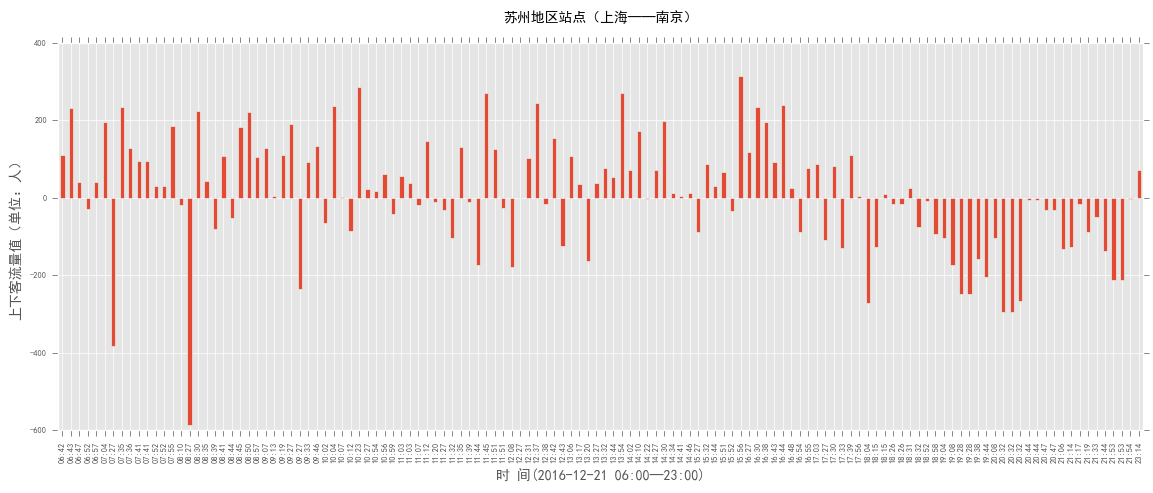

In [93]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# plt.figure(figsize=(19,7))
dmt= suzhou_df_to_plot2.sort_values(by='start_time_y')
dmt.plot(y='tickets', x ='start_time_y',kind = 'bar',figsize=(14,5), legend=False,fontsize=6)
plt.xlabel(u'时 间(2016-12-21 06:00—23:00)',size=10)
plt.ylabel(u'上下客流量值（单位：人）',size=10)
plt.title(u'苏州地区站点（上海——南京）\n',size=10)
# plt.show()
# plt.tight_layout()
plt.savefig('suzhou.png',dpi=300)

In [134]:
import arrow
arrow.get('2016-12-19 08:05', 'YY-MM-DD HH:mm').format('HH:mm')

'08:05'

In [ ]:
import arrow
suzhou_df_top_plot.index = suzhou_df_top_plot.index.\
apply(lambda x: arrow.get(x,'YY-MM-DD HH:mm').format('HH:mm'))